<a href="https://colab.research.google.com/github/madelinemccombe/LaunchDS/blob/master/Regex_NLTK_GoT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# link to the Kaggle dataset https://www.kaggle.com/khulasasndh/game-of-thrones-books#005ssb.txtfrom google.colab import files
upload = files.upload()

Saving 001ssb.txt to 001ssb.txt


In [0]:
# reading in the data in two forms (line by line and as one big string)
got1 = open("001ssb.txt").read().strip().split('\n')
got = open("001ssb.txt").read()

In [0]:
import pandas as pd
import numpy as np
import nltk
import re
import random
import matplotlib.pyplot as plt

In [0]:
# Text exploration:
print('There are', len(got1), 'lines')
print(got1[len(got1)-1], 'is the last page')
got1[-10:]

There are 20168 lines
Page 571 is the last page


['lay his arakh at her feet. "Blood of my blood," he murmured, pushing his face to the smoking earth. ',
 '"Blood of my blood," she heard Aggo echo. "Blood of my blood," Rakharo shouted. ',
 'And after them came her handmaids, and then the others, all the Dothraki, men and women and children, ',
 'and Dany had only to look at their eyes to know that they were hers now, today and tomorrow and ',
 "forever, hers as they had never been Drogo's. ",
 'As Daenerys Targaryen rose to her feet, her black hissed, pale smoke venting from its mouth and ',
 'nostrils. The other two pulled away from her breasts and added their voices to the call, translucent wings ',
 'unfolding and stirring the air, and for the first time in hundreds of years, the night came alive with the ',
 'music of dragons. ',
 'Page 571']

In [0]:
# re.search:
print(re.search(r'[a-zA-Z]+', 'There is a queen in the castle.'))
print(re.search(r'[a-zA-Z]*', ' There is a queen in the castle.'))
print(re.search(r'dragon', got))

<_sre.SRE_Match object; span=(0, 5), match='There'>
<_sre.SRE_Match object; span=(0, 0), match=''>
<_sre.SRE_Match object; span=(50041, 50047), match='dragon'>


In [0]:
# re.match vs re.fullmatch:
print(re.match(r'\w+', got))
print(re.match(r'\w+', ', queen'))

print(re.fullmatch(r'queen', 'There is a queen in the castle.'))
print(re.fullmatch(r'queen', 'queen'))
print(re.fullmatch(r'.*', 'There is a queen in the castle.'))
print(re.fullmatch(r'.*', 'There is a queen in the castle.\n'))

<_sre.SRE_Match object; span=(0, 1), match='A'>
None
None
<_sre.SRE_Match object; span=(0, 5), match='queen'>
<_sre.SRE_Match object; span=(0, 31), match='There is a queen in the castle.'>
None


In [76]:
# re.findall vs re.finditer:
print(re.findall(r'dragon', got))
print(re.findall(r'\w+ \w+', 'There is a queen in the castle.'))

print(re.finditer(r'dragon', got))
for match in re.finditer(r'\w+ \w+', 'There is a queen in the castle.'):
  print(match.start(), match.end(), match.group())

['dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon', 'dragon',

In [197]:
# re.sub and re.split:
print(re.sub(r'\w+', 'word', 'There is a queen in the castle.'))
print(re.sub(r'queen', 'Queen', 'There is a queen in the castle.'))

print(re.split(r'\W+',"This is the queen's castle. So exciting!"))
print(re.split(r'\s+',"This is the queen's castle. So exciting!"))
print(re.split(r'[^a-zA-Z\']+',"This is the queen's castle. So exciting!"))

word word word word word word word.
There is a Queen in the castle.
['This', 'is', 'the', 'queen', 's', 'castle', 'So', 'exciting', '']
['This', 'is', 'the', "queen's", 'castle.', 'So', 'exciting!']
['This', 'is', 'the', "queen's", 'castle', 'So', 'exciting', '']


In [0]:
# Tokenization:
#nltk.download('punkt') # may need this to avoid errors
from nltk.tokenize import word_tokenize, sent_tokenize

print(word_tokenize("This is the queen's castle. So exciting!"))
print(sent_tokenize(got)[1:10])
got_words = word_tokenize(got)

['This', 'is', 'the', 'queen', "'s", 'castle', '.', 'So', 'exciting', '!']
['"The wildlings are \ndead."', '"Do the dead frighten you?"', 'Ser Waymar Royce asked with just the hint of a smile.', 'Gared did not rise to the bait.', 'He was an old man, past fifty, and he had seen the lordlings come and go.', '"Dead is dead," he said.', '"We have no business with the dead."', '"Are they dead?"', 'Royce asked softly.']


In [121]:
# Removing stopwords and punctuation:
# nltk.download('stopwords') may need this to avoid errors

from nltk.corpus import stopwords
stop_words=stopwords.words("english")
print(random.sample(stop_words, 10))
print('There are', len(stop_words), 'English stopwords.')

import string
punct = list(string.punctuation)
print(punct[0:15])
print('There are', len(punct), 'punctuation marks.')

stops = stop_words + punct + ["''", 'r.', '``', "'s", "n't"]

filtered_words=[]
for w in got_words:
    if w.lower() not in stops:
        filtered_words.append(w.lower())
print(filtered_words[0:10])

# currently contains ['page', '#'] for each page in the list

['now', 'about', 'to', 'too', 'himself', 'were', 'some', "you'll", 'why', 'couldn']
There are 179 English stopwords.
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/']
There are 32 punctuation marks.
['game', 'thrones', 'book', 'one', 'song', 'ice', 'fire', 'george', 'martin', 'prologue']


In [167]:
# Stemming: 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))
print('Original:', filtered_words[7],filtered_words[9],filtered_words[12],filtered_words[13],filtered_words[15],filtered_words[19],filtered_words[25],filtered_words[26])
print('Stemmed:', stemmed_words[7],stemmed_words[9],stemmed_words[12],stemmed_words[13],stemmed_words[15],stemmed_words[19],stemmed_words[25],stemmed_words[26])

# Lemmatization: 
# nltk.download('wordnet') # may need to avoid errors
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
lemm_words=[]
for w in filtered_words:
    lemm_words.append(lem.lemmatize(w, 'v'))
print('Lemmatized:', lemm_words[7],lemm_words[9],lemm_words[12],lemm_words[13],lemm_words[15],lemm_words[19],lemm_words[25],lemm_words[26])
print('\n')    

# Example:
word = "leaves"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",ps.stem(word))

Original: george prologue gared urged began wildlings royce asked
Stemmed: georg prologu gare urg began wildl royc ask
Lemmatized: george prologue gared urge begin wildlings royce ask


Lemmatized Word: leave
Stemmed Word: leav


In [195]:
# Regex tokenizer
from nltk.tokenize import RegexpTokenizer 
print(RegexpTokenizer(r'\w+').tokenize("This is the queen's castle. So exciting!"))
print(RegexpTokenizer(r'\S+').tokenize("This is the queen's castle. So exciting!"))
print(RegexpTokenizer(r'[a-zA-Z\']+').tokenize("This is the queen's castle. So exciting!"))

['This', 'is', 'the', 'queen', 's', 'castle', 'So', 'exciting']
['This', 'is', 'the', "queen's", 'castle.', 'So', 'exciting!']
['This', 'is', 'the', "queen's", 'castle', 'So', 'exciting']


In [187]:
# using re.search with nltk
words_ending_with_ing = [w for w in got_words if re.search("ing$", w)]
print('Tokens:', words_ending_with_ing[3:9])
words_ending_with_ing2 = [w for w in lemm_words if re.search("ing$", w)]
print('Lemmatized:', words_ending_with_ing2[3:9])

Tokens: ['falling', 'being', 'something', 'rushing', 'Something', 'riding']
Lemmatized: ['something', 'something', 'wildling', 'something', 'something', 'nothing']


In [223]:
# text objects
got_text = nltk.Text(lemm_words)
print(got_text)
print(got_text.findall(r'<.*><daenerys><.*>'))
print(got_text.findall(r'<.*><blood><dragon><.*>'))
print(got_text.findall(r'<.*><iron><throne><.*>'))

<Text: game throne book one song ice fire george...>
hide daenerys brother; usurper daenerys quicken; day daenerys want;
hot daenerys flinch; archer daenerys say; princess daenerys magister;
hand daenerys find; help daenerys collar; sister daenerys stormborn;
ebony daenerys look; catch daenerys knight; enough daenerys smile; 64
daenerys daenerys; give daenerys brother; princess daenerys wed; tell
daenerys stormborn; fill daenerys give; report daenerys targaryen;
begin daenerys dothraki; queen daenerys queen; silver daenerys
targaryen; whereas daenerys fourteen-year-old; kinder daenerys
targaryen; grant daenerys targaryen; know daenerys horse; mount
daenerys glad; death daenerys choice; 326 daenerys heart; sword
daenerys breast; shadow daenerys go; girl daenerys child; say daenerys
let; concern daenerys targaryen; mean daenerys take; go daenerys last;
address daenerys house; targaryen daenerys stormborn; stallion
daenerys beside; 443 daenerys battle; dragon daenerys targaryen; hand
daen

/usr/local/lib/python3.6/dist-packages/yellowbrick/text/dispersion.py:163: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points_target = np.stack(self._compute_dispersion(X, y))
/usr/local/lib/python3.6/dist-packages/yellowbrick/text/dispersion.py:169: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points_target[:,1].astype(int)))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


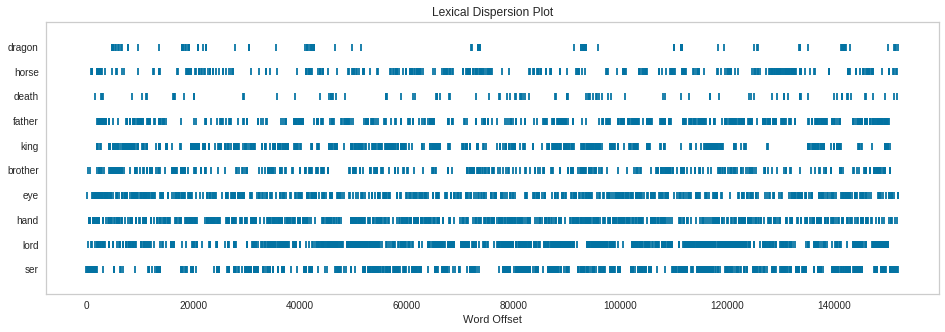

In [152]:
# lexical dispersion plot:
from yellowbrick.text import DispersionPlot
topics = ['dragon','horse','death','father','king','brother','eye','hand', 'lord', 'ser']
plt.figure(figsize=(16,5))
visualizer = DispersionPlot(topics)
visualizer.fit([lemm_words])
visualizer.poof()

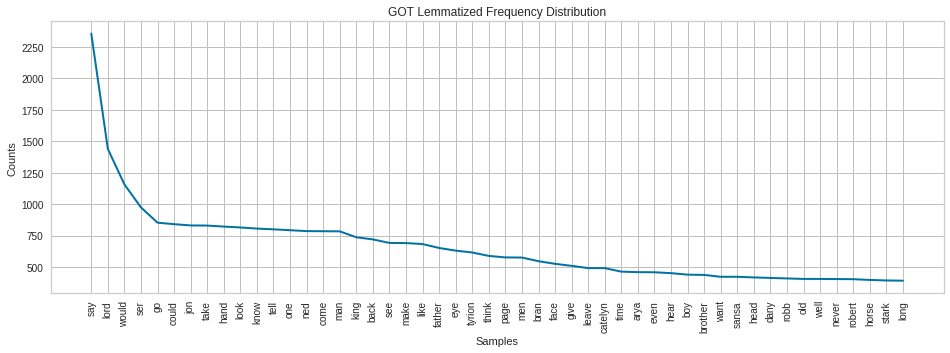

In [153]:
# frequency distribution plot:
words = lemm_words
freqdist = nltk.FreqDist(words)
plt.figure(figsize=(16,5))
plt.title('GOT Lemmatized Frequency Distribution')
freqdist.plot(50)


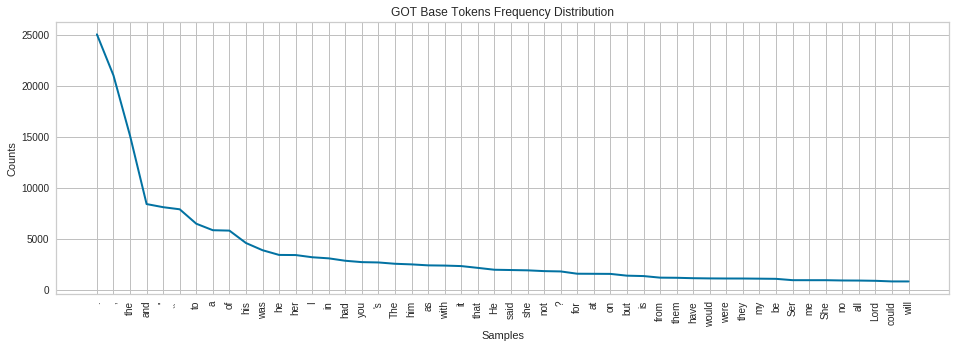

<Figure size 576x396 with 0 Axes>

In [163]:
# frequency distribution plot:
words = got_words
freqdist = nltk.FreqDist(words)
plt.figure(figsize=(16,5))
plt.title('GOT Base Tokens Frequency Distribution')
freqdist.plot(50)
plt.savefig('token_dist.png')